In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Parseo de columnas

In [4]:
df = pd.read_csv("Entrenamieto_ECI_2020.csv", dtype={
                    'Region': 'category', 
                    'Territory': 'category',
                    'Pricing, Delivery_Terms_Quote_Appr': 'bool',
                    'Pricing, Delivery_Terms_Approved': 'bool',
                    'Bureaucratic_Code_0_Approval': 'bool',
                    'Bureaucratic_Code_0_Approved': 'bool',
                    'Submitted_for_Approval': 'bool', 
                    'Bureaucratic_Code': 'category',
                    'Source ': 'category',
                    'Billing_Country': 'category',
                    'Account_Name': 'category',
                    'Opportunity_Name': 'category',
                    'Opportunity_ID': 'int',
                    'Sales_Contract_No': 'category',
                    'Account_Owner': 'category',      
                    'Opportunity_Owner': 'category', 
                    'Account_Type': 'category', 
                    'Opportunity_Type': 'category',     
                    'Quote_Type': 'category', 
                    'Delivery_Terms': 'category',
                    'Brand': 'category',
                    'Product_Type': 'category',
                    'Size': 'category',
                    'Product_Category_B': 'category',    
                    'Currency': 'category',
                    'Last_Modified_By': 'category',    
                    'Product_Family': 'category',    
                    'Product_Name': 'category',
                    'ASP_Currency': 'category',    
                    'ASP_(converted)_Currency': 'category',    
                    'Delivery_Quarter': 'category',  
                    'Total_Amount_Currency': 'category',
                    'Total_Taxable_Amount_Currency': 'category',
                    'Stage': 'category',
                    'Prod_Category_A': 'category'})

df["Price"] = pd.to_numeric(df['Price'], errors='coerce',)
#No pude convertir la columna 'Sales_Contract_No' a int. Ademas es una variable categorica al igual 
#que 'Opportunity_ID'
#pd.to_numeric(df['Sales_Contract_No'], errors='coerce',downcast='integer')

df['Actual_Delivery_Date'] = pd.to_datetime(df['Actual_Delivery_Date'])
df['Last_Activity'] = pd.to_datetime(df['Last_Activity'])

df['Account_Created_Date'] = pd.to_datetime(df['Account_Created_Date']\
                                            .apply(lambda x: x.replace('/', '')), format='%m%d%Y')
df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date']\
                                            .apply(lambda x: x.replace('/', '')), format='%m%d%Y')
df['Quote_Expiry_Date'] = pd.to_datetime(df['Quote_Expiry_Date']\
                                            .apply(lambda x: x.replace('/', '')), format='%m%d%Y')
df['Last_Modified_Date'] = pd.to_datetime(df['Last_Modified_Date']\
                                            .apply(lambda x: x.replace('/', '')), format='%m%d%Y')
df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date']\
                                            .apply(lambda x: x.replace('/', '')), format='%m%d%Y')

df['Planned_Delivery_End_Date'] = pd.to_datetime(df['Planned_Delivery_End_Date']\
                                            .apply(lambda x: x.replace('/', '')), format='%m%d%Y')
df['Month'] = pd.to_datetime(df['Month']\
                          .apply(lambda x: x.replace(' - ', '')), format='%Y%m')


df.describe()


,ID,Opportunity_ID,Price,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,356.000000,13738.000000,13738.000000,16947.000000,16947.000000,1.688800e+04,1.694700e+04
mean,17666.650440,5335.940225,0.320323,7.012128,0.432554,2017.137428,2.338172,1.993659e+06,3.224117e+06
std,6940.859372,3324.723809,0.074717,18.858359,0.758659,0.829603,12.169339,1.848426e+07,2.030360e+07
min,4854.000000,0.000000,0.200000,0.000000,0.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00
25%,11953.000000,2448.500000,0.260000,0.360000,0.373260,2016.000000,0.000000,2.677500e+04,8.546580e+04
50%,18114.000000,5306.000000,0.307500,0.400000,0.412850,2017.000000,0.000000,1.072500e+05,3.760672e+05
75%,23845.500000,7698.000000,0.370000,0.505000,0.476490,2018.000000,1.000000,4.603898e+05,1.037450e+06
max,28773.000000,12803.000000,0.560000,80.000000,67.000000,2020.000000,500.000000,1.320000e+09,1.356339e+09


# Preguntas

+ ¿Cual es la distribucion de la cantidad de contratos en las regiones?
+ ¿Y dentro de cada región?
+ ¿Cual es la región con mas contratos?
+ ¿Cual es la región con la mayor tasa de contratos con el estado "Closed Won"?
+ ¿Cual es la distribucion de los valores de la variable Stage segun la región?
+ Cual es la cantidad de contratos, y como es su distribucion con respecto a su cantidad de items?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  category      
 2   Territory                           16947 non-null  category      
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  bool          
 4   Pricing, Delivery_Terms_Approved    16947 non-null  bool          
 5   Bureaucratic_Code_0_Approval        16947 non-null  bool          
 6   Bureaucratic_Code_0_Approved        16947 non-null  bool          
 7   Submitted_for_Approval              16947 non-null  bool          
 8   Bureaucratic_Code                   16947 non-null  category      
 9   Account_Created_Date                16947 non-null  datetime64[ns]
 10  Source                

In [6]:
#Veamos la cantidad de datos no nulos por columna, zeros, none, y nulos
df2 = df.count().to_frame()

df2 = df2.rename(columns = {0:'count'})
df2['Null'] = df.isna().sum()
df2['zeros'] = 0
df2['zeros'] += df.select_dtypes(include=['number']).eq(0).sum()
df2['None'] = df.eq('None').sum()
df2

G:\Programas\Anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,count,Null,zeros,None
ID,16947,0,0.0,0
Region,16947,0,NaN,0
Territory,16947,0,NaN,4999
"Pricing, Delivery_Terms_Quote_Appr",16947,0,NaN,0
"Pricing, Delivery_Terms_Approved",16947,0,NaN,0
Bureaucratic_Code_0_Approval,16947,0,NaN,0
Bureaucratic_Code_0_Approved,16947,0,NaN,0
Submitted_for_Approval,16947,0,NaN,0
Bureaucratic_Code,16947,0,NaN,0
Account_Created_Date,16947,0,NaN,0


Las columnas "Actual_Delivery_Date", "Last_Activity" a primeras no aportan alguna informacion que pueda servir ya que no tienen registros.

## Cantidad de valores no nulos en variables numéricas

Text(0.5, 0, 'columnas numéricas')

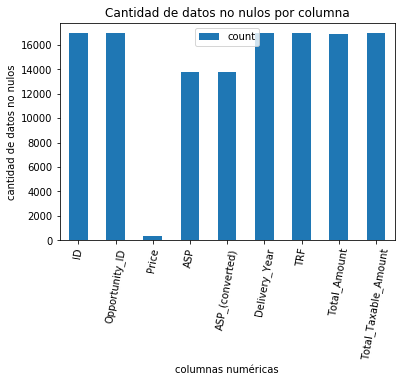

In [7]:
#Obtengo una lista de las columnas numéricas
columns_with_numbers = df.select_dtypes(include=['number']).columns.to_list()
df2_with_numbers = df2.loc[columns_with_numbers,'count'].to_frame()

df2_with_numbers.plot(kind= 'bar',rot=80, title='Cantidad de datos no nulos por columna')
ax= plt.gca()
ax.set_ylabel('cantidad de datos no nulos')
ax.set_xlabel('columnas numéricas')

## Variable Price


356


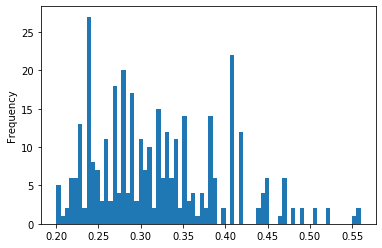

In [8]:
print( len(df.Price) - df.Price.isnull().sum() )
#Solo tiene 356 datos validos, un 2.10%
df['Price'].plot(kind='hist', bins=70) 

Text(0, 0.5, 'Densidad')

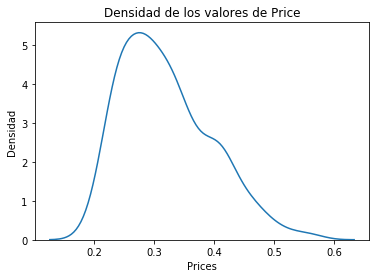

In [9]:
g = sns.distplot(df['Price'], hist=False)
g.set_title("Densidad de los valores de Price")
g.set_xlabel("Prices")
g.set_ylabel("Densidad")

## Cantidad de valores "None" en variables categóricas

In [10]:
columns_category = df.select_dtypes(include=['category']).columns.to_list()
#filtro las columnas que estan completas
df2_category = df2.loc[columns_category and (df2['None'] != 0) ,'None'].to_frame()
#Convierto las cantidades en porcentajes
df2_category = df2_category / 16947 * 100
df2_category

,None
Territory,29.497846
Source,56.039417
Billing_Country,0.159320
Sales_Contract_No,41.145926
Account_Type,0.660884
Brand,93.886824
Product_Type,94.028442
Size,94.217266
Product_Category_B,93.987136
Currency,94.718829


Text(0.5, 0, 'columnas categóricas')

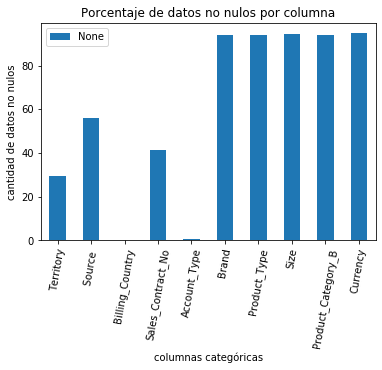

In [11]:
df2_category.plot(kind= 'bar', rot= 80, title='Porcentaje de datos no nulos por columna')
ax= plt.gca()
ax.set_ylabel('cantidad de datos no nulos')
ax.set_xlabel('columnas categóricas')

Las columnas "Brand", "Product_Type", "Size", "Product_category_B" y "Currency" tienen mas del 90 % de registros definidos con "None".
Lo mismo sucede con "Territory", "Source", y "Sales_contract_No" pero en menor medida.
#Podremos inferir algunos registros de territory consultando la columna "Region".
#Que "Sales_contract_No" tenga 41.15% de "None", quiere decir que  hay cerca de la mitad de registros que no están al menos identificados con un numero de contrato.


## Cantidad de valores  "None" en variables categóricas

In [12]:
#Obtengo una lista de las variables categóricas
colums_category = df.select_dtypes(include=['category']).columns.to_list()
#filtro las columnas que tienen al menos un None
df2_category_with_none = df2.loc[colums_category and df2['None'] != 0,'None'].to_frame()
#Convierto las cantidades en porcentajes
df2_category_with_none = df2_category_with_none / len(df) * 100
df2_category_with_none

,None
Territory,29.497846
Source,56.039417
Billing_Country,0.159320
Sales_Contract_No,41.145926
Account_Type,0.660884
Brand,93.886824
Product_Type,94.028442
Size,94.217266
Product_Category_B,93.987136
Currency,94.718829


Text(0.5, 0, 'columnas')

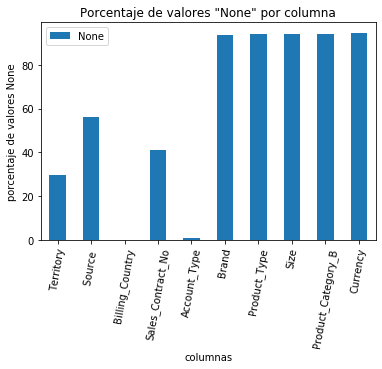

In [13]:
df2_category_with_none.plot(kind= 'bar', rot= 80, title='Porcentaje de valores "None" por columna')
ax= plt.gca()
ax.set_ylabel('porcentaje de valores None')
ax.set_xlabel('columnas')

## Contratos por regiones

In [14]:
df[['Region','Territory','Sales_Contract_No']].eq('None').sum() / len(df) * 100

Region                0.000000
Territory            29.497846
Sales_Contract_No    41.145926
dtype: float64

In [15]:
Regions = df[['Region','Sales_Contract_No']].groupby('Region').count()
Regions.Sales_Contract_No

Region
APAC           3262
Americas       3945
EMEA           4664
Japan          4892
Middle East     184
Name: Sales_Contract_No, dtype: int64

Text(0.5, 0, 'Regiones')

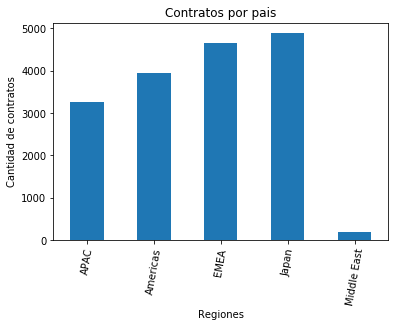

In [16]:
Regions.Sales_Contract_No.plot(kind= 'bar', rot= 80, title='Contratos por pais')
ax= plt.gca()
ax.set_ylabel('Cantidad de contratos')
ax.set_xlabel('Regiones')

## Contratos por Paises

In [17]:
df.Territory.value_counts()

None               4999
Germany            1682
NW America         1568
Australia          1208
India               809
                   ... 
Egypt                 1
Georgia               1
Solomon Islands       1
Slovenia              1
Czech Republic        1
Name: Territory, Length: 76, dtype: int64

Hay 4999 contratos que no tienen país definido. Tambien vemos que Japon tiene 681, pero en la tabla de Regiones, la Region 'Japan' tiene 4892 contratos.
Veamos cuales son las regiones de los contratos sin 'Territory' :

In [18]:
df['Regions with None'] = df['Territory'] == 'None'
Regions_with_None = df.loc[:,['Region','Regions with None']].groupby('Region').sum()
Regions_with_None

,Regions with None
Region,
APAC,0.0
Americas,571.0
EMEA,187.0
Japan,4211.0
Middle East,30.0


Si sumamos estos 4211 contratos de la Region 'Japan' con los 681 confirmados en la tabla de 'territory'
Nos quedan los 4892 que figuraban en la tabla de contratos por region
Por lo tanto, a los registros con Region Japan y valor 'None' en la columna 'territory' se lo cambiamos a 'Japan'.

In [19]:
df.loc[df.Territory.eq('None') & df.Region.eq('Japan') ,'Territory'] = 'Japan'
#Confirmemos consultando la tabla nuevamente
df['Regions with None'] = df['Territory'] == 'None'
Regions_with_None = df.loc[:,['Region','Regions with None']].groupby('Region').sum()
Regions_with_None

,Regions with None
Region,
APAC,0.0
Americas,571.0
EMEA,187.0
Japan,0.0
Middle East,30.0


In [20]:
Territories = df[['Territory','Sales_Contract_No']].groupby('Territory').count()
Territories_top10 = Territories['Sales_Contract_No'].nlargest(10)
Territories_top10

Territory
Japan          4892
Germany        1682
NW America     1568
Australia      1208
India           809
None            788
NE America      760
Netherlands     533
SE America      493
France          449
Name: Sales_Contract_No, dtype: int64

La mayor cantidad de contratos se concentran principalmente en Japan, seguido de Alemania, NW america
y Australia

Text(0.5, 0, 'Paises')

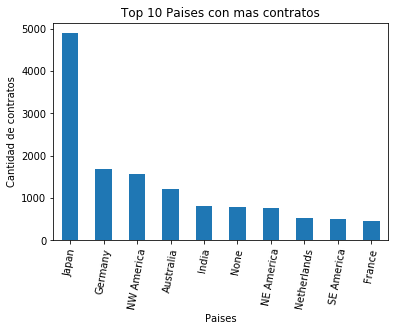

In [21]:
Territories_top10.plot(kind= 'bar', rot= 80, title='Top 10 Paises con mas contratos')
ax= plt.gca()
ax.set_ylabel('Cantidad de contratos')
ax.set_xlabel('Paises')

In [22]:
#Comparemos la cantidad de 'None' con el total segun su region, tambien sacamos el porcentaje.
Regions_with_None['Nro of contracts'] = Regions.Sales_Contract_No
Regions_with_None['Porcentage of None'] = Regions_with_None['Regions with None']   * 100       \
                                        / Regions.Sales_Contract_No
#Cambiamos el nombre de una columna para mejorar la visualizacion de la tabla
Regions_with_None = Regions_with_None.rename(columns= {'Regions with None':'Nro of None'})
Regions_with_None.reset_index()

,Region,Nro of None,Nro of contracts,Porcentage of None
0,APAC,0.0,3262,0.000000
1,Americas,571.0,3945,14.474018
2,EMEA,187.0,4664,4.009434
3,Japan,0.0,4892,0.000000
4,Middle East,30.0,184,16.304348


## Columna Billing_Country

In [23]:
## Algunos registros que no tienen pais designado en la columna 'Territory' podemos inferirlos por
# el pais en donde se emitió la factura, dada por la columna 'Billing_Country'

In [24]:
#Veamos si se cumple esto
df[['Billing_Country','Territory']]

,Billing_Country,Territory
0,Netherlands,None
1,Netherlands,None
2,United States,NW America
3,United States,NW America
4,United States,NW America
...,...,...
16942,Austria,Austria
16943,Austria,Austria
16944,Austria,Austria
16945,United States,NE America


In [25]:
#Veamos si tambien hay registros sin pais designado en la columna 'Billing_Country'
print( str(df.Billing_Country.eq('None').sum()) + ' registros con valor "None" ')
df.loc[df.Billing_Country.eq('None'),'Territory']

27 registros con valor "None" 


24                India
181             Tunisia
2613              India
3063              Japan
3071          Singapore
3091     United Kingdom
3579     United Kingdom
4200          Indonesia
7921            Germany
10278         Singapore
16144              None
16176       Philippines
16185         Indonesia
16186         Indonesia
16329         Singapore
16385          Cambodia
16451             India
16495             India
16617             India
16618             India
16628             India
16685             India
16710             India
16760             India
16832    United Kingdom
16833    United Kingdom
16836            Poland
Name: Territory, dtype: category
Categories (76, object): [Albania, Armenia, Australia, Austria, ..., UAE (Others), Ukraine, United Kingdom, Vietnam]

De estos 27 tambien podemos sacar el pais de la columna 'Territory', a excepcion de uno.

In [26]:
#Veamos cuantos registros hay sin pais designado, tanto en 'Territory' como en 'Billing_Country'
df.loc[df.Billing_Country.eq('None'),'Territory'].eq('None').sum()

1

In [27]:
#Procedemos a asignar los valores de 'Billing_Country' a 'Territory'


In [28]:
#Territories_for_billing_countries = df.loc[df.Billing_Country.eq('None') ,'Territory']
#df.loc[df.Billing_Country.eq('None') ,'Billing_Country'] = Territories_for_billing_countries


# Columna Opportunity_ID
>Ya que el porcentaje de Id's de contrato registrados es del 41%, tendremos que tomar en cuenta otra variable para hacer un relevo de la cantidad de oportunidades. En este caso, Opportunity_ID.

In [29]:
df.Opportunity_ID.value_counts().sort_index()

0        1
1        1
2        1
3        1
4        1
        ..
12799    1
12800    2
12801    3
12802    1
12803    1
Name: Opportunity_ID, Length: 9841, dtype: int64

In [30]:
print( 'Min: ' + str( df.Opportunity_ID.min() ) + '\nMáximo: '  + str( df.Opportunity_ID.max() )  )
print('Cantidad de oportunidades: ' + str( len( df.Opportunity_ID.value_counts() ) ) )

Min: 0
Máximo: 12803
Cantidad de oportunidades: 9841


In [31]:
Opportunities_by_region = df[['Region','Opportunity_ID']].groupby('Region').count()
Opportunities_by_region

,Opportunity_ID
Region,
APAC,3262
Americas,3945
EMEA,4664
Japan,4892
Middle East,184


Text(0.5, 0, 'Regiones')

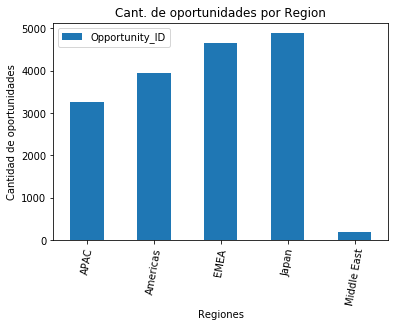

In [32]:
Opportunities_by_region.plot(kind= 'bar', rot= 80, title='Cant. de oportunidades por Region')
ax= plt.gca()
ax.set_ylabel('Cantidad de oportunidades')
ax.set_xlabel('Regiones')

# Preguntas
+ ¿Cual es el porcentaje de oportunidades con Stage Closed Won por Region?

In [33]:
df['is closed won'] = df.Stage == 'Closed Won'
df['is closed Lose'] = df.Stage == 'Closed Won'
df['is Proposal'] = df.Stage == 'Proposal'
df['is Negotiation'] = df.Stage == 'Negotiation'
df['Qualification'] = df.Stage == 'Qualification'


In [34]:
print(df['is closed won'].mean() * 100)
print(df['is closed Lose'].mean() * 100)
print(df['is Proposal'].mean() * 100)
print(df['is Negotiation'].mean() * 100)
print(df['Qualification'].mean() * 100)
       
df.groupby('Stage').count()
#Opportunities_by_region_won = df[['Region','Opportunity_ID','Stage']].groupby('Region')\
#                                .filter(df.Stage.eq('Closed Won'))
#Opportunities_by_region_won

56.25184398418599
56.25184398418599
0.20652622883106153
0.10621348911311736
0.06490824334690505


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A,Regions with None,is closed won,is closed Lose,is Proposal,is Negotiation,Qualification
Stage,,,,,,,,,,,,,,,,,,,,,
Closed Lost,7350,7350,7350,7350,7350,7350,7350,7350,7350,7350,...,7292,7350,7350,7350,7350,7350,7350,7350,7350,7350
Closed Won,9533,9533,9533,9533,9533,9533,9533,9533,9533,9533,...,9532,9533,9533,9533,9533,9533,9533,9533,9533,9533
Negotiation,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
Proposal,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
Qualification,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [35]:
df.Stage.value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [36]:
df.Size.value_counts()

None      15967
Other       394
Size_3      356
Size_4      196
Size_1       25
Size_0        7
Size_2        2
Name: Size, dtype: int64

In [37]:
df.Product_Type.value_counts()

None              15935
Other               515
Product_Type_3      179
Product_Type_1      142
Product_Type_0       94
Product_Type_4       73
Product_Type_2        9
Name: Product_Type, dtype: int64

In [38]:
df.Product_Category_B.value_counts()

None                     15928
Other                      523
Product_Category_B_2        59
Product_Category_B_12       51
Product_Category_B_7        47
Product_Category_B_4        37
Product_Category_B_5        36
Product_Category_B_17       27
Product_Category_B_1        24
Product_Category_B_3        23
Product_Category_B_8        23
Product_Category_B_19       22
Product_Category_B_11       21
Product_Category_B_13       18
Product_Category_B_16       17
Product_Category_B_9        17
Product_Category_B_24       16
Product_Category_B_20        9
Product_Category_B_6         9
Product_Category_B_21        8
Product_Category_B_15        8
Product_Category_B_23        5
Product_Category_B_14        4
Product_Category_B_26        4
Product_Category_B_10        3
Product_Category_B_0         3
Product_Category_B_27        3
Product_Category_B_22        2
Name: Product_Category_B, dtype: int64

In [39]:
df.Prod_Category_A.value_counts()

Prod_Category_A_None    16947
Name: Prod_Category_A, dtype: int64

In [44]:
df.Product_Name.value_counts()

Product_Name_100    976
Product_Name_226    836
Product_Name_231    579
Product_Name_491    524
Product_Name_4      474
                   ... 
Product_Name_189      1
Product_Name_364      1
Product_Name_191      1
Product_Name_359      1
Product_Name_34       1
Name: Product_Name, Length: 456, dtype: int64

# Precio promedio de productos segun region  
+ ¿Cuantos son los productos del catálogo?
+ ¿Cual es el precio promedio de estos segun la region?
+ Obtener una lista de estos productos
+ Obtener sus precios promedios clasificados por region.

In [66]:
print( 'Cantidad de productos: ' + str(len( df.Product_Name.value_counts() )) )

Cantidad de productos: 456


In [68]:
df.Product_Name.value_counts().nlargest(10)

Product_Name_100    976
Product_Name_226    836
Product_Name_231    579
Product_Name_491    524
Product_Name_4      474
Product_Name_192    442
Product_Name_111    388
Product_Name_132    383
Product_Name_495    350
Product_Name_29     345
Name: Product_Name, dtype: int64

In [100]:
#Veamos cuantos productos hay disponibles en cada region
products_by_region = df[['Region','Product_Name']]
products_by_region.groupby('Region').nunique().Product_Name

Region
APAC           286
Americas       225
EMEA           224
Japan          133
Middle East     93
Name: Product_Name, dtype: int64

Veamos cuantos productos hay en comun entre las regiones

In [112]:
products_common_by_region = products_by_region.groupby(['Product_Name','Region']).agg({'Product_Name':['count']}).reset_index()
products_common_by_region.columns= ('Product_Name', 'Region', 'Nro_of_products')
products_common_by_region

,Product_Name,Region,Nro_of_products
0,Product_Name_0,APAC,0
1,Product_Name_0,Americas,0
2,Product_Name_0,EMEA,0
3,Product_Name_0,Japan,165
4,Product_Name_0,Middle East,0
...,...,...,...
2275,Product_Name_87,APAC,0
2276,Product_Name_87,Americas,3
2277,Product_Name_87,EMEA,0
2278,Product_Name_87,Japan,0


In [113]:
products_common_by_region = products_common_by_region.pivot(index='Product_Name', columns='Region', values='Nro_of_products')
products_common_by_region

Region,APAC,Americas,EMEA,Japan,Middle East
Product_Name,,,,,
Product_Name_0,0,0,0,165,0
Product_Name_1,0,0,0,13,0
Product_Name_10,0,0,0,116,0
Product_Name_100,149,5,270,550,2
Product_Name_101,4,0,0,0,0
...,...,...,...,...,...
Product_Name_288,0,1,0,0,0
Product_Name_504,0,1,0,0,0
Product_Name_510,0,0,0,1,0


In [120]:
products_common_by_region = products_common_by_region.loc[products_common_by_region['APAC'].ne(0) &\
                             products_common_by_region['Americas'].ne(0) & \
                             products_common_by_region['EMEA'].ne(0) & \
                             products_common_by_region['Japan'].ne(0) & \
                             products_common_by_region['Middle East'].ne(0) ,: ]
print('Hay ' + str(len( products_common_by_region )) + ' productos en comun entre todas las regiones')
products_common_by_region


Hay 18 productos en comun entre todas las regiones


Region,APAC,Americas,EMEA,Japan,Middle East
Product_Name,,,,,
Product_Name_100,149,5,270,550,2
Product_Name_107,14,1,65,1,1
Product_Name_132,63,3,277,39,1
Product_Name_167,33,91,124,84,1
Product_Name_192,107,3,91,234,7
Product_Name_209,67,58,158,2,2
Product_Name_289,8,25,4,5,2
Product_Name_310,29,67,14,4,2
Product_Name_322,14,9,31,5,2


In [121]:
catalog_products_common_by_region = products_common_by_region.index.to_list()
catalog_products_common_by_region

['Product_Name_100',
 'Product_Name_107',
 'Product_Name_132',
 'Product_Name_167',
 'Product_Name_192',
 'Product_Name_209',
 'Product_Name_289',
 'Product_Name_310',
 'Product_Name_322',
 'Product_Name_413',
 'Product_Name_418',
 'Product_Name_431',
 'Product_Name_432',
 'Product_Name_433',
 'Product_Name_436',
 'Product_Name_439',
 'Product_Name_448',
 'Product_Name_451']

In [195]:
#Veamos si los productos tienen definidos sus precios en todas las regiones 
#Defino una funcion en la que calculo la cantidad de precios definidos por region, si el producto tiene todos sus precios definidos
#sumo en uno el contador. La funcion devuelve la cantidad de productos con precios definidos en todas las regiones.
def consult_prices(list):
    cont = 0
    for i in list:
        aaa = df.loc[df.Product_Name.eq(i),['Price','Region']].groupby('Region').agg({'Price':['count']}).reset_index()
        aaa.columns = ('Region','Price_count')
        if( len(aaa.loc[aaa.Price_count.ne(0),'Price_count']) == 5):
            cont += 1
            
    return(cont)    
print( consult_prices(catalog_products_common_by_region) )


0


In [178]:
#Veamos la cantidad de productos segun su cantidad de precios definidos por regiones
def consult_nro_prices_by_region(list):
    regions = []
    for a in range(0,6): 
        
        cont = 0
        
        for i in list:
            
            bbb = df.loc[df.Product_Name.eq(i),['Price','Region']].groupby('Region').agg({'Price':['count']}).reset_index()
            bbb.columns = ('Region','Price_count')
            if( len(bbb.loc[bbb.Price_count.ne(0),'Price_count']) == a):
                cont += 1
               
        regions.append("Productos con precios en {} regiones: {}".format(a,cont))
        
    return(regions)    
    
print( consult_nro_prices_by_region(catalog_products_common_by_region) )

['Productos con precios en 0 regiones: 7', 'Productos con precios en 1 regiones: 4', 'Productos con precios en 2 regiones: 3', 'Productos con precios en 3 regiones: 3', 'Productos con precios en 4 regiones: 1', 'Productos con precios en 5 regiones: 0']


In [204]:
#No tenemos los precios definidos, asique tomaremos otra variable: ASP_(converted), la cual refleja el precio promedio convertido a USD
#Veamos si tienen todos sus valores definidos en todas las regiones
def consult_asp_converted(list):
    cont = 0
    for i in list:
        aaa = df.loc[df.Product_Name.eq(i),['ASP_(converted)','Region']].groupby('Region').agg({'ASP_(converted)':['count']}).reset_index()
        aaa.columns = ('Region','ASP_count')
        if( len(aaa.loc[aaa.ASP_count.ne(0),'ASP_count']) == 5):
            cont += 1
            
    return(cont)    
print( consult_asp_converted(catalog_products_common_by_region) )

#ASP_(converted)

18


In [230]:
#Volvamos a la tabla de cantidad de ocurrencias de los productos por region
products_common_by_region

Region,APAC,Americas,EMEA,Japan,Middle East
Product_Name,,,,,
Product_Name_100,149,5,270,550,2
Product_Name_107,14,1,65,1,1
Product_Name_132,63,3,277,39,1
Product_Name_167,33,91,124,84,1
Product_Name_192,107,3,91,234,7
Product_Name_209,67,58,158,2,2
Product_Name_289,8,25,4,5,2
Product_Name_310,29,67,14,4,2
Product_Name_322,14,9,31,5,2


In [223]:
products_by_region_with_asp_converted = df[['Region','Product_Name','ASP_(converted)']]

In [224]:
products_by_region_with_asp_converted = products_by_region_with_asp_converted.groupby(['Product_Name','Region']).agg({'ASP_(converted)':['mean']},errors='coerce').reset_index()
products_by_region_with_asp_converted.columns= ('Product_Name', 'Region', 'ASP_converted')
products_by_region_with_asp_converted

,Product_Name,Region,ASP_converted
0,Product_Name_0,APAC,NaN
1,Product_Name_0,Americas,NaN
2,Product_Name_0,EMEA,NaN
3,Product_Name_0,Japan,0.000
4,Product_Name_0,Middle East,NaN
...,...,...,...
2275,Product_Name_87,APAC,NaN
2276,Product_Name_87,Americas,0.645
2277,Product_Name_87,EMEA,NaN
2278,Product_Name_87,Japan,NaN


In [268]:
products_by_region_and_asp_converted = products_by_region_with_asp_converted.pivot(index='Product_Name', columns='Region', values='ASP_converted')
plt_product_prices = products_by_region_and_asp_converted.loc[catalog_products_common_by_region,:]
plt_product_prices

Region,APAC,Americas,EMEA,Japan,Middle East
Product_Name,,,,,
Product_Name_100,0.473835,0.516000,0.526325,0.710577,0.415000
Product_Name_107,0.352719,0.375000,0.464078,0.665290,0.360000
Product_Name_132,0.367407,0.335000,0.386757,0.421995,0.340000
Product_Name_167,0.462164,0.498341,0.542695,0.466440,0.415000
Product_Name_192,0.428634,0.458333,0.463727,0.470442,0.441000
Product_Name_209,0.377563,0.424627,0.419816,0.449520,0.380000
Product_Name_289,0.445000,0.534104,0.505657,0.523240,0.450000
Product_Name_310,0.385450,0.520061,0.477150,0.352260,0.195000
Product_Name_322,0.434286,0.502222,0.400260,0.391984,0.410000


In [279]:
catalog_product_std = plt_product_prices.std(axis=1) > 0.05
catalog_product_std = catalog_product_std[catalog_product_std.eq(True)].index.to_list()
catalog_product_std

['Product_Name_100',
 'Product_Name_107',
 'Product_Name_310',
 'Product_Name_413',
 'Product_Name_418',
 'Product_Name_436',
 'Product_Name_439',
 'Product_Name_451']

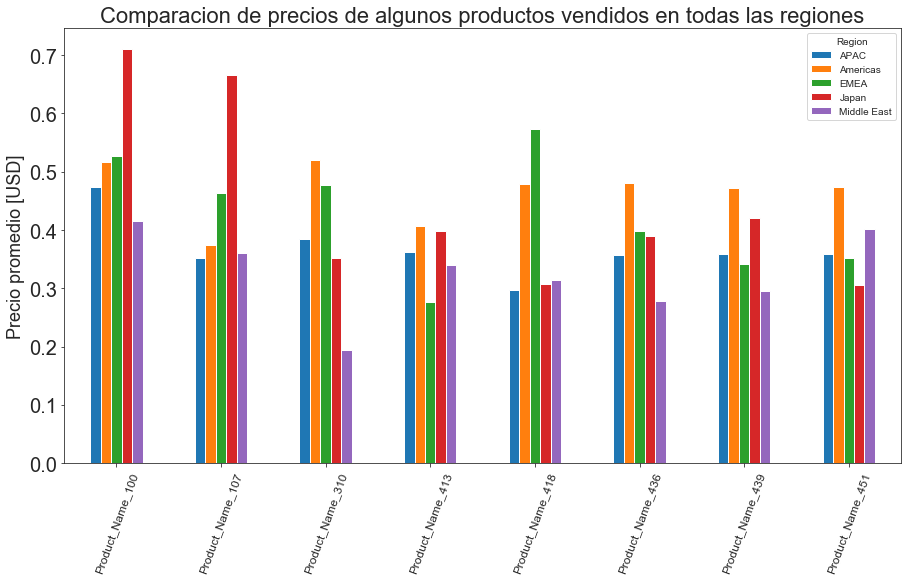

In [285]:

plt_product_prices.loc[catalog_product_std,:].plot(kind='bar', figsize=(15,8), sort_columns=True, fontsize=20, rot= 360)
plt.xticks(rotation=70, horizontalalignment="center", fontsize = 12)
plt.xlabel('')
plt.ylabel("Precio promedio [USD]", fontsize = 18)
plt.title('Comparacion de precios de algunos productos vendidos en todas las regiones', fontsize = 22)
plt.show()

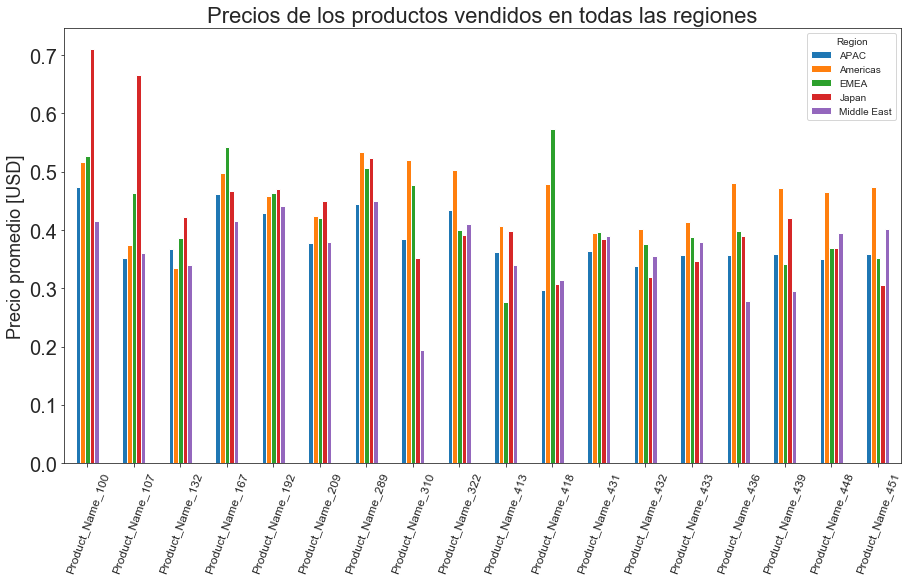

In [283]:
plt_product_prices.plot(kind='bar', figsize=(15,8), sort_columns=True, fontsize=20, rot= 360)
plt.xticks(rotation=70, horizontalalignment="center", fontsize = 12)
plt.xlabel('')
plt.ylabel("Precio promedio [USD]", fontsize = 18)
plt.title('Precios de los productos vendidos en todas las regiones', fontsize = 22)
plt.show()